# Busqueda por Profundidad

A continuacion se ejemplifica la busqueda por profundidad revisada en clase. Para ello se tiene un ejemplo de la solucion de un Puzzle utilizando recursividad


In [60]:
# Busqueda en Profundidad

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

In [63]:
# Implementacion del metodo de busqueda por profundidad
def search_profundidad(init_node, solution, visited):
    visited.append(init_node.data) #Lista de visitados
    if init_node.data == solution: # Condicion de salida recursividad (Encontro la solucion)
        return init_node # Retorno el nodo resultado
    else:
        # Expandir nodos sucesores (hijos)
        node_data = init_node.data
        son = [node_data[1], node_data[0], node_data[2], node_data[3]]
        izq = Node(son)
        son = [node_data[0], node_data[2], node_data[1], node_data[3]]
        centro = Node(son)
        son = [node_data[0], node_data[1], node_data[3], node_data[2]]
        der = Node(son)
        init_node.set_child([izq, centro, der])

        for node_son in init_node.child: # Recorrer los nodos hijos
            if not node_son.data in visited: # No deben estar en los nodos visitados
                # Llamada Recursiva
                Solution = search_profundidad(node_son, solution, visited) 
                if Solution is not None: # Cuando encuentra una solucion
                    return Solution # Retornamos la solucion encontrada
        return None

init_state = [4, 2, 3, 1] # Creamos un estado inicial
solution = [1, 2, 3, 4] # La solucion que debe buscar
#Inicializamos las variables
solution_node = None 
visited = []
init_node = Node(init_state)
node = search_profundidad(init_node, solution, visited) # Llamamos la metodo de busqueda

# Mostrar Resultado
result = []
while node.fathr is not None:
    result.append(node.data)
    node = node.fathr
result.append(init_state)
result.reverse() # Reverso el resultado (Solo para presentar)
print(result)

[[1, 2, 3, 4], [2, 1, 3, 4], [2, 3, 1, 4], [3, 2, 1, 4], [3, 1, 2, 4], [1, 3, 2, 4], [1, 3, 4, 2], [3, 1, 4, 2], [3, 4, 1, 2], [4, 3, 1, 2], [4, 1, 3, 2], [1, 4, 3, 2], [1, 4, 2, 3], [4, 1, 2, 3], [4, 2, 1, 3], [2, 4, 1, 3]]


## Practica

Implementar un algoritmo que me permita dibujar la busqueda de soluciones.

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Centros educativos, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.

Realizar un metodo de busqueda para encontrar la solucion de colocar en un tablero las 4 reinas.


Subir el cuaderno con la resolucion.


In [4]:
#Definimos una funcion para obtener el costo - CompareTo (Java)
def Compare(node):
    return node.cost

['Azogues', 'Borrero', 'San Cristóbal', 'Hacienda Josefina']
Costo total: 18.900000000000002
['Azogues', 'Borrero', 'San Cristóbal', 'Hacienda Josefina']


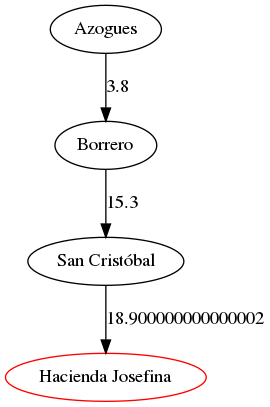

In [5]:
import networkx as nx
from IPython.display import Image, display

Grafo=nx.DiGraph()

def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

if __name__ == "__main__":
    connections = {
        'Azogues': {'Sageo':4, 'Luis Cordero':5.2, 'Borrero':3.8,'Zullín':11.5,'Cojitambo':9.5},
        'Sageo': {'Biblían':3.3, 'Azogues':4},
        'Luis Cordero': {'Azogues':5.2},
        'Borrero': {'San Cristóbal':11.5,'Azogues':3.8},
        'Zullín': {'Hacienda Josefina':14.3, 'Azogues':11.5},
        'Cojitambo': {'Déleg':13, 'Azogues':9.5},
        'Biblían': {'Sageo':3.3},
        'San Cristóbal': {'Hacienda Josefina':3.6, 'Borrero':11.5},
        'Hacienda Josefina': {'Zullín':14.3,'San Cristóbal':3.6},
        'Déleg': {'Ayancay':7.9, 'Cojitambo':13},
        'Ayancay':{'Chuquipata':12.4,'Déleg':7.9},
        'Chuquipata':{'Ayancay':12.4}
    }

def search_profundidad(init_node, solution, visited,con,costo,g):
    visited.append(init_node.data) #Lista de visitados
    if init_node.data == solution: # Condicion de salida recursividad (Encontro la solucion)
        init_node.cost=costo
        g.add_node(init_node.data,color='red')
        return init_node # Retorno el nodo resultado
    else: 
        # Expandir nodos sucesores (hijos)
        node_data = init_node.data
        child_list=[]
        for node in con[node_data]:
            child = Node(node)
            cost = con[node_data][node]
            child.cost=cost
            child_list.append(child)
        child_list = sorted(child_list, key=Compare)
        init_node.set_child(child_list)
        for son in init_node.child: # Recorrer los nodos hijos
            if not son.data in visited: # No deben estar en los nodos visitados
                # Llamada Recursiva 
                costo=costo+son.cost
                g.add_edge(init_node.data,son,label=costo)
                Solution = search_profundidad(son, solution, visited,con,costo,g) 
                if Solution is not None: # Cuando encuentra una solucion
                    return Solution # Retornamos la solucion encontrada
        return None

init_state = 'Azogues' # Creamos un estado inicial
solution = 'Hacienda Josefina' # La solucion que debe buscar
#Inicializamos las variables
solution_node = None 
visited = []
init_node = Node(init_state)  
costo = 0
node = search_profundidad(init_node, solution, visited,connections,costo,Grafo) # Llamamos la metodo de busqueda
# Mostrar Resultado
result = []
if node is not None:
    fcosto=node.cost
    while node.fathr is not None:
        result.append(node.data)
        node = node.fathr
    result.append(init_state)
    result.reverse() # Reverso el resultado (Solo para presentar)
    print(result)
    print("Costo total: %s" % str(fcosto)) # Imprimir el costo total de llegar al nodo
else:
    print("No hay solucion")

def graficarRes(grafo):
    print(result)
    p=nx.drawing.nx_pydot.to_pydot(grafo)
    for i, edge in enumerate(p.get_edges()):
        edge.set_label(str(edge.get_label()))
    view_pydot(p)
graficarRes(Grafo)

# Mapa

Imagen de las oficianas de educación con respecto a mi casa: 
<img src="Educación.PNG">

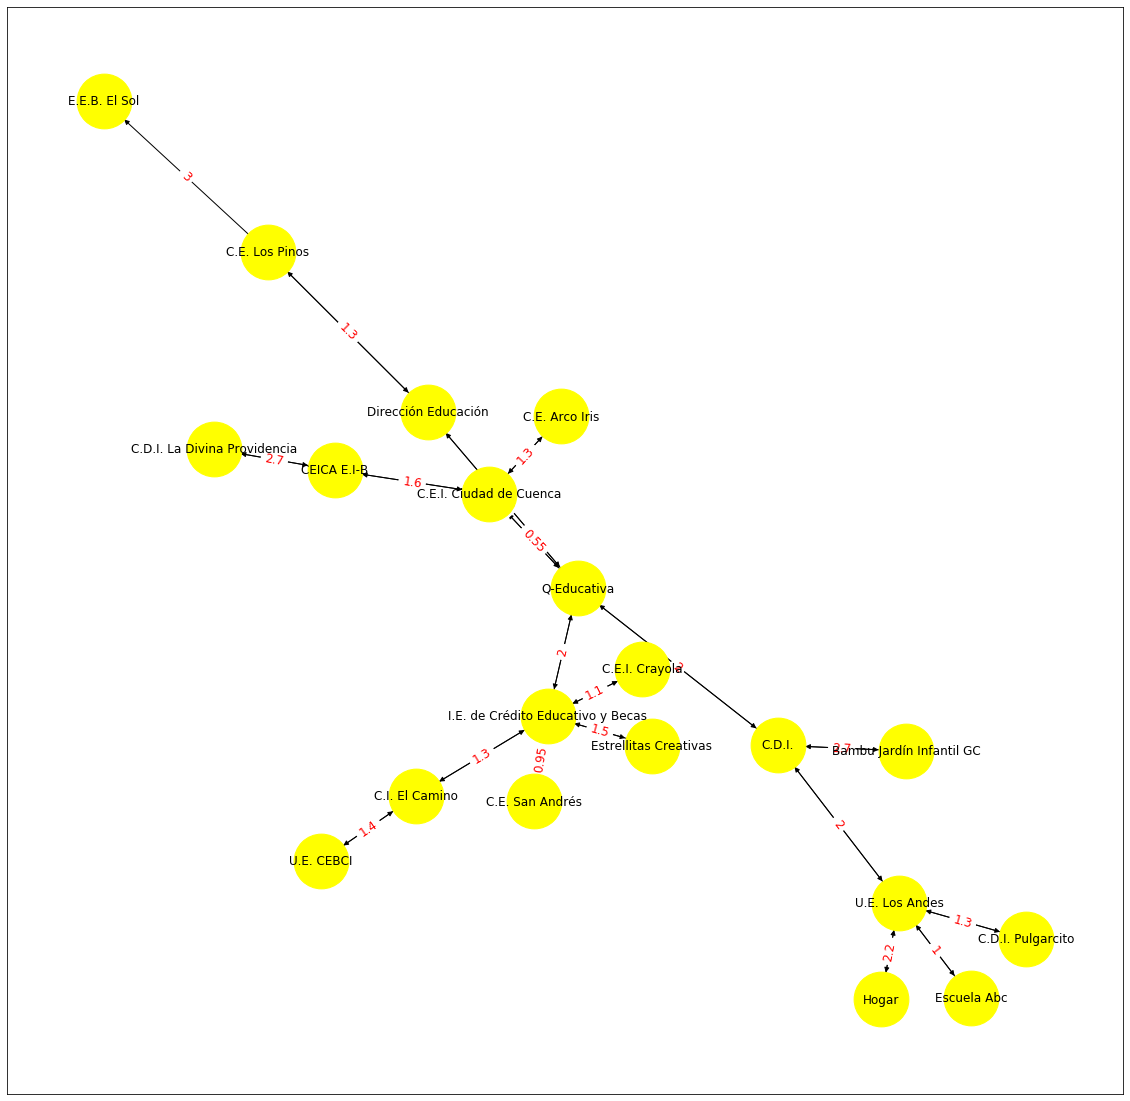

In [11]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

educativos = {
        'Hogar': {'U.E. Los Andes':2.2},
        'U.E. Los Andes': {'Escuela Abc':1, 'C.D.I. Pulgarcito':1.3,'C.D.I.':2,'Hogar':2.2},
        'Escuela Abc': {'U.E. Los Andes':1},
        'C.D.I. Pulgarcito': {'U.E. Los Andes':1.3},
        'C.D.I.': {'Bambu Jardín Infantil GC':2.7, 'Q-Educativa':2,'U.E. Los Andes':2},
        'Bambu Jardín Infantil GC': {'C.D.I.':2.7},
        'Q-Educativa': {'C.E.I. Ciudad de Cuenca':0.55, 'Dirección Educación':0.95,'I.E. de Crédito Educativo y Becas':2,'C.D.I.':2},
        'C.E.I. Ciudad de Cuenca': {'C.E. Arco Iris':1.3,'CEICA E.I-B':1.6,'Q-Educativa':0.55},
        'Dirección Educación': {'C.E. Los Pinos':1.3, 'Q-Educativa':0.95},
        'I.E. de Crédito Educativo y Becas': {'C.E. San Andrés':0.95,'C.E.I. Crayola':1.1,'Estrellitas Creativas':1.5,'C.I. El Camino':1.3,'Q-Educativa':2},
        'C.E. Arco Iris': {'C.E.I. Ciudad de Cuenca':1.3},
        'CEICA E.I-B':{'C.D.I. La Divina Providencia':2.7,'C.E.I. Ciudad de Cuenca':1.6},
        'C.E. Los Pinos':{'E.E.B. El Sol':3,'Dirección Educación':1.3},
        'C.E. San Andrés':{'I.E. de Crédito Educativo y Becas':0.95},
        'C.E.I. Crayola':{'I.E. de Crédito Educativo y Becas':1.1},
        'Estrellitas Creativas':{'I.E. de Crédito Educativo y Becas':1.5},
        'C.I. El Camino':{'U.E. CEBCI':1.4,'I.E. de Crédito Educativo y Becas':1.3},
        'C.D.I. La Divina Providencia':{'CEICA E.I-B':2.7},
        'U.E. CEBCI':{'C.I. El Camino':1.4}
}

def graficar(datos):
    graf = nx.DiGraph()
    graf.add_nodes_from(datos)
    for valor, listaValor in datos.items():
        for a in listaValor:
            graf.add_edge(valor,a,size=250,length=str(listaValor[a]))
    
    pos = nx.spring_layout(graf)
    plt.figure(figsize=(20,20)) 
    #print(" ")
    labels = nx.get_edge_attributes(graf,'length')
    #print(labels)
    nx.draw_networkx(graf, pos, node_color = 'yellow', with_labels = True, node_size=3000)
    nx.draw_networkx_edge_labels(graf,pos,edge_labels=labels,font_color='red',font_size=12)
    plt.show()

graficar(educativos)

['Hogar', 'U.E. Los Andes', 'C.D.I.', 'Q-Educativa', 'Dirección Educación']
Costo total: 10.0


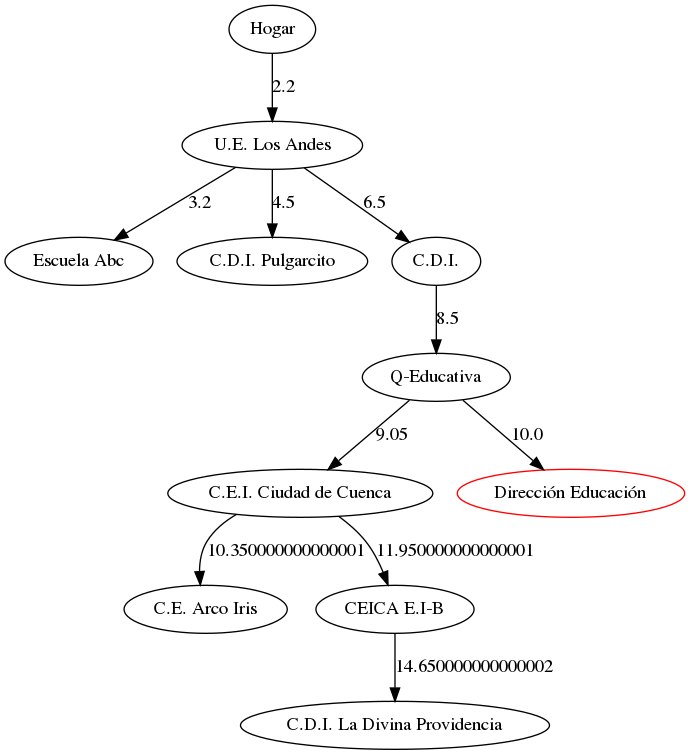

In [16]:
import networkx as nx
from IPython.display import Image, display

Grafo=nx.DiGraph()

def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

def search_profundidad(init_node, solution, visited,con,costo,g):
    visited.append(init_node.data) #Lista de visitados
    if init_node.data == solution: # Condicion de salida recursividad (Encontro la solucion)
        init_node.cost=round(costo,2)
        g.add_node(init_node.data,color='red')
        return init_node # Retorno el nodo resultado
    else: 
        # Expandir nodos sucesores (hijos)
        node_data = init_node.data
        child_list=[]
        for node in con[node_data]:
            child = Node(node)
            cost = con[node_data][node]
            child.cost=round(cost,2)
            child_list.append(child)
        child_list = sorted(child_list, key=Compare)
        init_node.set_child(child_list)
        for son in init_node.child: # Recorrer los nodos hijos
            if not son.data in visited: # No deben estar en los nodos visitados
                # Llamada Recursiva 
                costo=costo+son.cost
                g.add_edge(init_node.data,son,label=costo)
                Solution = search_profundidad(son, solution, visited,con,costo,g) 
                if Solution is not None: # Cuando encuentra una solucion
                    return Solution # Retornamos la solucion encontrada
        return None

init_state = 'Hogar' # Creamos un estado inicial
solution = 'Dirección Educación' # La solucion que debe buscar
#Inicializamos las variables
solution_node = None 
visited = []
init_node = Node(init_state)  
costo = 0
node = search_profundidad(init_node, solution, visited,educativos,costo,Grafo) # Llamamos la metodo de busqueda
# Mostrar Resultado
result = []
if node is not None:
    fcosto=node.cost
    while node.fathr is not None:
        result.append(node.data)
        node = node.fathr
    result.append(init_state)
    result.reverse() # Reverso el resultado (Solo para presentar)
    print(result)
    print("Costo total: %s" % str(fcosto)) # Imprimir el costo total de llegar al nodo
else:
    print("No hay solucion")

def graficarRes(grafo):
    p=nx.drawing.nx_pydot.to_pydot(grafo)
    for i, edge in enumerate(p.get_edges()):
        edge.set_label(str(edge.get_label()))
    view_pydot(p)
graficarRes(Grafo)

In [10]:
#Cuatro Reinas
#Le paso un arreglo de ceros y al finas me devuelve las posiciones de columna donde deben ir las reinas 
#para encontrar la solución.
sol=[0,0,0,0]
fila=0
def CuatroReinas(sol,fila,n):
    if fila>=n:
        return False

    enc = False

    while True:
            if (sol[fila] < n):
                sol[fila] = sol[fila] + 1
            
            if (Validar(sol,fila)):
                
                if fila != n-1:
                    enc = CuatroReinas(sol, fila+1,n)
                    if enc==False:
                        sol[fila+1] = 0
                else:
                    print(sol)
                    enc = True
            if (sol[fila]==n or enc==True):
                break
    return enc

def Validar(sol,fila):
    for i in range(fila):
        if (sol[i]==sol[fila]) or (abs(fila-i)== abs(sol[fila]-sol[i])):
            return False
    return True

print(CuatroReinas(sol,fila,4))

[2, 4, 1, 3]
True


# Conclusiones

Concluyó que este metodo nos ayuda a encontrar una solución siempre que existe, pero no es lo más óptimo.